# ESCUELA POLITÉCNICA NACIONAL

![](logoEpn.jpg){width=3cm height=3cm fig-align="center"}

# TAREA N°8 Ejercicios Unidad 03 C Mínimos Cuadrados

### 1. Dados los datos:

| xi   | 4.0  | 4.2  | 4.5  | 4.7  | 5.1  | 5.5  | 5.9  | 6.3  | 6.8  | 7.1  |
|------|------|------|------|------|------|------|------|------|------|------|
| yi   |102.56|130.11|113.18|142.05|167.53|195.14|224.87|256.73|299.50|326.72|

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

# Función general de mínimos cuadrados
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> np.ndarray:
    """
    Resuelve el sistema de ecuaciones normales del método de mínimos cuadrados.
    """
    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    num_pars = len(gradiente)

    # Matriz aumentada A|b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        Ab[i, :] = der_parcial(xs, ys)

    A = Ab[:, :-1]
    b = Ab[:, -1]

    return np.linalg.solve(A, b)

#### a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.

In [3]:
# Derivadas parciales para y = a1*x + a0
def der_parcial_a0(xs: list, ys: list) -> tuple:
    """
    Derivada parcial respecto a a0:
    a1 * sum(xi) + a0 * n = sum(yi)
    """
    c1 = sum(xs)
    c0 = len(xs)
    c_ind = sum(ys)
    return (c1, c0, c_ind)


def der_parcial_a1(xs: list, ys: list) -> tuple:
    """
    Derivada parcial respecto a a1:
    a1 * sum(xi^2) + a0 * sum(xi) = sum(xi*yi)
    """
    c1 = sum(xi**2 for xi in xs)
    c0 = sum(xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))
    return (c1, c0, c_ind)

# Datos del ejercicio 1
x = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
y = [102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72]

# Cálculo de los coeficientes
a1, a0 = ajustar_min_cuadrados(
    xs=x,
    ys=y,
    gradiente=[der_parcial_a0, der_parcial_a1]
)

print(f"a1 = {a1:.4f}")
print(f"a0 = {a0:.4f}")
signo = "+" if a0 >= 0 else "-"
print(f"Ecuación ajustada: y = {a1:.4f}x {signo} {abs(a0):.4f}")


# Error cuadrático total
def error_cuadratico(xs, ys, a1, a0):
    E = 0
    for xi, yi in zip(xs, ys):
        y_hat = a1 * xi + a0
        E += (yi - y_hat) ** 2
    return E

E = error_cuadratico(x, y, a1, a0)
print(f"Error cuadrático total = {E:.4f}")

a1 = 71.6102
a0 = -191.5724
Ecuación ajustada: y = 71.6102x - 191.5724
Error cuadrático total = 1058.8389


#### b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

# Función general de mínimos cuadrados
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> np.ndarray:

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    num_pars = len(gradiente)
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        Ab[i, :] = der_parcial(xs, ys)

    A = Ab[:, :-1]
    b = Ab[:, -1]

    return np.linalg.solve(A, b)

# Derivadas parciales para y = a2*x^2 + a1*x + a0
def der_parcial_a0(xs, ys):
    # a2*sum(x^2) + a1*sum(x) + a0*n = sum(y)
    c2 = sum(xi**2 for xi in xs)
    c1 = sum(xs)
    c0 = len(xs)
    c_ind = sum(ys)
    return (c2, c1, c0, c_ind)


def der_parcial_a1(xs, ys):
    # a2*sum(x^3) + a1*sum(x^2) + a0*sum(x) = sum(x*y)
    c2 = sum(xi**3 for xi in xs)
    c1 = sum(xi**2 for xi in xs)
    c0 = sum(xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))
    return (c2, c1, c0, c_ind)


def der_parcial_a2(xs, ys):
    # a2*sum(x^4) + a1*sum(x^3) + a0*sum(x^2) = sum(x^2*y)
    c2 = sum(xi**4 for xi in xs)
    c1 = sum(xi**3 for xi in xs)
    c0 = sum(xi**2 for xi in xs)
    c_ind = sum((xi**2) * yi for xi, yi in zip(xs, ys))
    return (c2, c1, c0, c_ind)

# Datos del ejercicio 1
x = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
y = [102.56, 130.11, 113.18, 142.05, 167.53,
     195.14, 224.87, 256.73, 299.50, 326.72]


# Ajuste por mínimos cuadrados (grado 2)
a2, a1, a0 = ajustar_min_cuadrados(
    xs=x,
    ys=y,
    gradiente=[der_parcial_a0, der_parcial_a1, der_parcial_a2]
)

print(f"a2 = {a2:.6f}")
print(f"a1 = {a1:.6f}")
print(f"a0 = {a0:.6f}")

signo1 = "+" if a1 >= 0 else "-"
signo0 = "+" if a0 >= 0 else "-"
print(f"Ecuación ajustada:")
print(f"y = {a2:.6f}x^2 {signo1} {abs(a1):.6f}x {signo0} {abs(a0):.6f}")

# Error cuadrático total
def error_cuadratico(xs, ys, a2, a1, a0):
    E = 0
    for xi, yi in zip(xs, ys):
        y_hat = a2*xi**2 + a1*xi + a0
        E += (yi - y_hat)**2
    return E


E = error_cuadratico(x, y, a2, a1, a0)
print(f"Error cuadrático total = {E:.4f}")

a2 = 8.217072
a1 = -19.308604
a0 = 51.000789
Ecuación ajustada:
y = 8.217072x^2 - 19.308604x + 51.000789
Error cuadrático total = 551.6562


#### c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
# Función general de mínimos cuadrados
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> np.ndarray:

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    num_pars = len(gradiente)
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        Ab[i, :] = der_parcial(xs, ys)

    A = Ab[:, :-1]
    b = Ab[:, -1]

    return np.linalg.solve(A, b)

# Derivadas parciales para y = a3*x^3 + a2*x^2 + a1*x + a0
def der_parcial_a0(xs, ys):
    # a3*sum(x^3) + a2*sum(x^2) + a1*sum(x) + a0*n = sum(y)
    c3 = sum(xi**3 for xi in xs)
    c2 = sum(xi**2 for xi in xs)
    c1 = sum(xs)
    c0 = len(xs)
    c_ind = sum(ys)
    return (c3, c2, c1, c0, c_ind)

def der_parcial_a1(xs, ys):
    # a3*sum(x^4) + a2*sum(x^3) + a1*sum(x^2) + a0*sum(x) = sum(x*y)
    c3 = sum(xi**4 for xi in xs)
    c2 = sum(xi**3 for xi in xs)
    c1 = sum(xi**2 for xi in xs)
    c0 = sum(xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))
    return (c3, c2, c1, c0, c_ind)

def der_parcial_a2(xs, ys):
    # a3*sum(x^5) + a2*sum(x^4) + a1*sum(x^3) + a0*sum(x^2) = sum(x^2*y)
    c3 = sum(xi**5 for xi in xs)
    c2 = sum(xi**4 for xi in xs)
    c1 = sum(xi**3 for xi in xs)
    c0 = sum(xi**2 for xi in xs)
    c_ind = sum((xi**2) * yi for xi, yi in zip(xs, ys))
    return (c3, c2, c1, c0, c_ind)

def der_parcial_a3(xs, ys):
    # a3*sum(x^6) + a2*sum(x^5) + a1*sum(x^4) + a0*sum(x^3) = sum(x^3*y)
    c3 = sum(xi**6 for xi in xs)
    c2 = sum(xi**5 for xi in xs)
    c1 = sum(xi**4 for xi in xs)
    c0 = sum(xi**3 for xi in xs)
    c_ind = sum((xi**3) * yi for xi, yi in zip(xs, ys))
    return (c3, c2, c1, c0, c_ind)
# Datos del ejercicio 1
x = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
y = [102.56, 130.11, 113.18, 142.05, 167.53,
     195.14, 224.87, 256.73, 299.50, 326.72]
# Ajuste por mínimos cuadrados (grado 3)
a3, a2, a1, a0 = ajustar_min_cuadrados(
    xs=x,
    ys=y,
    gradiente=[der_parcial_a0, der_parcial_a1, der_parcial_a2, der_parcial_a3]
)
print(f"a3 = {a3:.8f}")
print(f"a2 = {a2:.6f}")
print(f"a1 = {a1:.6f}")
print(f"a0 = {a0:.6f}")
signo2 = "+" if a2 >= 0 else "-"
signo1 = "+" if a1 >= 0 else "-"
signo0 = "+" if a0 >= 0 else "-"
print(f"Ecuación ajustada:")
print(f"y = {a3:.8f}x^3 {signo2} {abs(a2):.6f}x^2 {signo1} {abs(a1):.6f}x {signo0} {abs(a0):.6f}")

# Error cuadrático total
def error_cuadratico(xs, ys, a3, a2, a1, a0):
    E = 0
    for xi, yi in zip(xs, ys):
        y_hat = a3*xi**3 + a2*xi**2 + a1*xi + a0
        E += (yi - y_hat)**2
    return E
E = error_cuadratico(x, y, a3, a2, a1, a0)
print(f"Error cuadrático total = {E:.4f}")

a3 = -2.60683872
a2 = 51.560957
a1 = -254.874783
a0 = 469.163265
Ecuación ajustada:
y = -2.60683872x^3 + 51.560957x^2 - 254.874783x + 469.163265
Error cuadrático total = 518.3831


#### d. Construya el polinomio por mínimos cuadrados de la forma $𝑏e^{ax}$ y calcule el error.

In [11]:
# minimos cuadrados para la forma be^ax 
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

# Función general de mínimos cuadrados
def ajustar_min_cuadrados(xs, ys, gradiente):
    Ab = np.zeros((len(gradiente), len(gradiente) + 1))

    for i, der in enumerate(gradiente):
        Ab[i, :] = der(xs, ys)

    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

# Derivadas parciales para Y = a*x + B
def der_parcial_A(xs, Ys):
    # A*sum(x^2) + B*sum(x) = sum(x*Y)
    cA = sum(xi**2 for xi in xs)
    cB = sum(xs)
    c_ind = sum(xi * Yi for xi, Yi in zip(xs, Ys))
    return (cA, cB, c_ind)

def der_parcial_B(xs, Ys):
    # A*sum(x) + B*n = sum(Y)
    cA = sum(xs)
    cB = len(xs)
    c_ind = sum(Ys)
    return (cA, cB, c_ind)

# Datos del ejercicio
x = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
y = [102.56, 130.11, 113.18, 142.05, 167.53,
     195.14, 224.87, 256.73, 299.50, 326.72]

# Transformación logarítmica
Y = [np.log(yi) for yi in y]

# Ajuste
a, B = ajustar_min_cuadrados(
    xs=x,
    ys=Y,
    gradiente=[der_parcial_A, der_parcial_B]
)

b = np.exp(B)

print(f"a = {a:.6f}")
print(f"b = {b:.6f}")
print(f"Ecuación ajustada:")
print(f"y = {b:.6f} e^({a:.6f}x)")

# Error cuadrático (en y, no en log)
def error_cuadratico(xs, ys, a, b):
    E = 0
    for xi, yi in zip(xs, ys):
        y_hat = b * np.exp(a * xi)
        E += (yi - y_hat)**2
    return E

E = error_cuadratico(x, y, a, b)
print(f"Error cuadrático total = {E:.4f}")

a = 0.368477
b = 24.776724
Ecuación ajustada:
y = 24.776724 e^(0.368477x)
Error cuadrático total = 821.0051


#### e. Construya el polinomio por mínimos cuadrados de la forma $𝑏𝑥^𝑛$ y calcule el error.

In [17]:
# mínimos cuadrados para la forma y = b x^a
import numpy as np
import matplotlib.pyplot as plt

# Función general de mínimos cuadrados
def ajustar_min_cuadrados(xs, ys, gradiente):
    Ab = np.zeros((len(gradiente), len(gradiente) + 1))

    for i, der in enumerate(gradiente):
        Ab[i, :] = der(xs, ys)

    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)


# Derivadas parciales para Y = a*X + B
def der_parcial_a(Xs, Ys):
    # a*sum(X^2) + B*sum(X) = sum(X*Y)
    ca = sum(Xi**2 for Xi in Xs)
    cB = sum(Xs)
    c_ind = sum(Xi * Yi for Xi, Yi in zip(Xs, Ys))
    return (ca, cB, c_ind)


def der_parcial_B(Xs, Ys):
    # a*sum(X) + B*n = sum(Y)
    ca = sum(Xs)
    cB = len(Xs)
    c_ind = sum(Ys)
    return (ca, cB, c_ind)


# Datos del ejercicio
x = [4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1]
y = [102.56, 130.11, 113.18, 142.05, 167.53,
     195.14, 224.87, 256.73, 299.50, 326.72]

# Transformación logarítmica
X = [np.log(xi) for xi in x]
Y = [np.log(yi) for yi in y]


# Ajuste
a, B = ajustar_min_cuadrados(
    xs=X,
    ys=Y,
    gradiente=[der_parcial_a, der_parcial_B]
)

b = np.exp(B)

print(f"a = {a:.6f}")
print(f"b = {b:.6f}")
print("Ecuación ajustada:")
print(f"y = {b:.6f} x^{a:.6f}")


# Error cuadrático
def error_cuadratico(xs, ys, a, b):
    E = 0
    for xi, yi in zip(xs, ys):
        y_hat = b * xi**a
        E += (yi - y_hat)**2
    return E


E = error_cuadratico(x, y, a, b)
print(f"Error cuadrático total = {E:.4f}")

a = 1.993285
b = 6.518682
Ecuación ajustada:
y = 6.518682 x^1.993285
Error cuadrático total = 581.5573


### 2. Repita el ejercicio 5 para los siguientes datos.

| xi   | 0.2     | 0.3     | 0.6    | 0.9    | 1.1    | 1.3    | 1.4    | 1.6    |
|------|---------|---------|--------|--------|--------|--------|--------|--------|
| yi   |0.050446 |0.098426 |0.33277 |0.72660 |1.0972  |1.5697  |1.8487  |2.5015  |


In [19]:
# minimos cuadrados para la forma y= bx^a
import numpy as np
import matplotlib.pyplot as plt

# Función general de mínimos cuadrados
def ajustar_min_cuadrados(xs, ys, gradiente):
    Ab = np.zeros((len(gradiente), len(gradiente) + 1))

    for i, der in enumerate(gradiente):
        Ab[i, :] = der(xs, ys)

    A = Ab[:, :-1]
    b = Ab[:, -1]
    return np.linalg.solve(A, b)

# Derivadas parciales para Y = a*X + B
def der_parcial_a(Xs, Ys):
    # a*sum(X^2) + B*sum(X) = sum(X*Y)
    ca = sum(Xi**2 for Xi in Xs)
    cB = sum(Xs)
    c_ind = sum(Xi * Yi for Xi, Yi in zip(Xs, Ys))
    return (ca, cB, c_ind)

def der_parcial_B(Xs, Ys):
    # a*sum(X) + B*n = sum(Y)
    ca = sum(Xs)
    cB = len(Xs)
    c_ind = sum(Ys)
    return (ca, cB, c_ind)

# Datos del ejercicio 2
xs = [0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6]
ys = [0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015]

# Transformación logarítmica
X = [np.log(xi) for xi in xs]
Y = [np.log(yi) for yi in ys]

# Ajuste
a, B = ajustar_min_cuadrados(
    xs=X,
    ys=Y,
    gradiente=[der_parcial_a, der_parcial_B]
)

b = np.exp(B)

print(f"a = {a:.6f}")
print(f"b = {b:.6f}")
print("Ecuación ajustada:")
print(f"y = {b:.6f} x^{a:.6f}")

# Error cuadrático
def error_cuadratico(xs, ys, a, b):
    E = 0
    for xi, yi in zip(xs, ys):
        y_hat = b * xi**a
        E += (yi - y_hat)**2
    return E

E = error_cuadratico(xs, ys, a, b)
print(f"Error cuadrático total = {E:.4f}")

a = 1.872009
b = 0.950156
Ecuación ajustada:
y = 0.950156 x^1.872009
Error cuadrático total = 0.0545


### 3. La siguiente tabla muestra los promedios de puntos del colegio de 20 especialistas en matemáticas y ciencias computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique estos datos y encuentre la ecuación de la recta por mínimos cuadrados para estos datos.

| Puntuación ACT | Promedio de puntos | Puntuación ACT | Promedio de puntos |
|----------------|--------------------|----------------|--------------------|
| 28             | 3.84               | 29             | 3.75               |
| 25             | 3.21               | 28             | 3.65               |
| 28             | 3.23               | 27             | 3.87               |
| 27             | 3.63               | 29             | 3.75               |
| 28             | 3.75               | 21             | 1.66               |
| 33             | 3.20               | 28             | 3.12               |
| 28             | 3.41               | 28             | 2.96               |
| 29             | 3.38               | 26             | 2.92               |
| 23             | 3.53               | 30             | 3.10               |
| 27             | 2.03               | 24             | 2.81               |

a1 = 0.100858
a0 = 0.486576
Ecuación de la recta de mínimos cuadrados:
y = 0.100858x + 0.486576


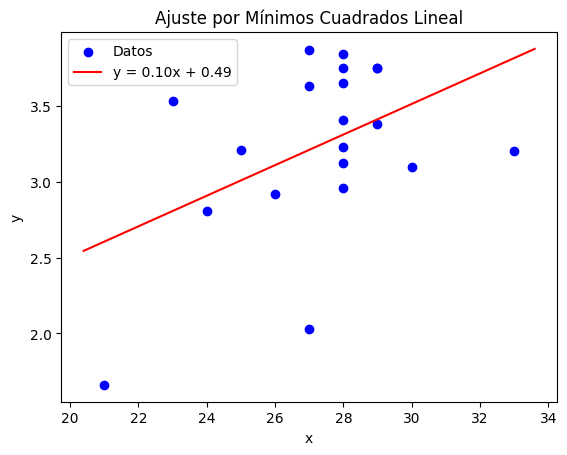

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Función de mínimos cuadrados lineale 
def minimos_cuadrados_lineal(x, y):
    n = len(x)

    sum_x = sum(x)
    sum_y = sum(y)
    sum_x2 = sum(xi**2 for xi in x)
    sum_xy = sum(xi * yi for xi, yi in zip(x, y))

    a1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    a0 = (sum_y - a1 * sum_x) / n

    return a1, a0

# Dato 
x = [
    28, 25, 28, 27, 28, 33, 28, 29, 23, 27,
    29, 28, 27, 29, 21, 28, 28, 26, 30, 24
]

y = [
    3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03,
    3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81
]

# Ajuste
a1, a0 = minimos_cuadrados_lineal(x, y)

print(f"a1 = {a1:.6f}")
print(f"a0 = {a0:.6f}")
print("Ecuación de la recta de mínimos cuadrados:")
print(f"y = {a1:.6f}x + {a0:.6f}")

# Grafica y en la etiqueta muestra la ecuación de la recta
plt.scatter(x, y, color='blue', label='Datos')
x_vals = np.array(plt.gca().get_xlim())
y_vals = a1 * x_vals + a0
plt.plot(x_vals, y_vals, color='red', label=f'y = {a1:.2f}x + {a0:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste por Mínimos Cuadrados Lineal')
plt.legend()
plt.show()

### 4. El siguiente conjunto de datos, presentado al Subcomité Antimonopolio del Senado, muestra las características comparativas de supervivencia durante un choque de automóviles de diferentes clases. Encuentre la recta por mínimos cuadrados que aproxima estos datos (la tabla muestra el porcentaje de vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria).

| Tipo                              | Peso promedio | Porcentaje de presentación |
|-----------------------------------|---------------|----------------------------|
| 1. Regular lujoso doméstico       | 4800 lb       | 3.1                        |
| 2. Regular intermediario doméstico| 3700 lb       | 4.0                        |
| 3. Regular económico doméstico    | 3400 lb       | 5.2                        |
| 4. Compacto doméstico             | 2800 lb       | 6.4                        |
| 5. Compacto extranjero            | 1900 lb       | 9.6                        |

a1 = -0.002255
a0 = 13.146500
Ecuación ajustada: y = -0.002255x + 13.146500


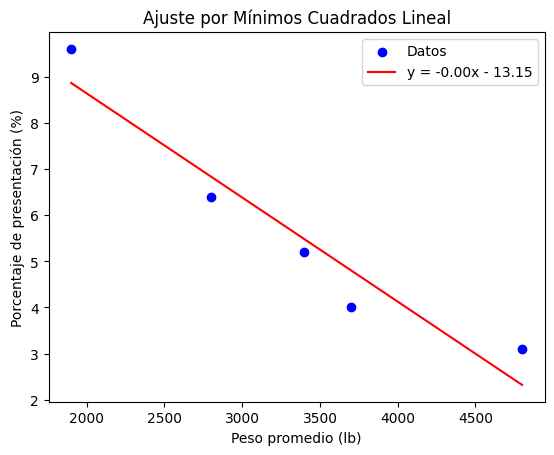

In [41]:
# minimos cuadrados para y = a1*x + a0
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

# Función general de mínimos cuadrados
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> np.ndarray:

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    num_pars = len(gradiente)
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        Ab[i, :] = der_parcial(xs, ys)

    A = Ab[:, :-1]
    b = Ab[:, -1]

    return np.linalg.solve(A, b)

# Datos del ejercicio 4
x=[4800, 3700, 3400, 2800, 1900]
y=[3.1, 4.0, 5.2, 6.4, 9.6]

# Ajuste por mínimos cuadrados (grado 1)
def der_parcial_a0(xs: list, ys: list) -> tuple:
    """
    Derivada parcial respecto a a0:
    a1 * sum(xi) + a0 * n = sum(yi)
    """
    c1 = sum(xs)
    c0 = len(xs)
    c_ind = sum(ys)
    return (c1, c0, c_ind)

def der_parcial_a1(xs: list, ys: list) -> tuple:
    """
    Derivada parcial respecto a a1:
    a1 * sum(xi^2) + a0 * sum(xi) = sum(xi*yi)
    """
    c1 = sum(xi**2 for xi in xs)
    c0 = sum(xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))
    return (c1, c0, c_ind)

a1, a0 = ajustar_min_cuadrados(
    xs=x,
    ys=y,
    gradiente=[der_parcial_a1, der_parcial_a0]
)

print(f"a1 = {a1:.6f}")
print(f"a0 = {a0:.6f}")
signo = "+" if a1 >= 0 else "-"
print(f"Ecuación ajustada: y = {a1:.6f}x + {a0:.6f}")

# Grafica y en la etiqueta muestra la ecuación de la recta
plt.scatter(x, y, color='blue', label='Datos')
x_vals = np.linspace(min(x), max(x), 100)
y_vals = a1 * x_vals + a0
plt.plot(x_vals, y_vals, color='red', label=f'y = {a1:.2f}x {signo} {abs(a0):.2f}')
plt.xlabel('Peso promedio (lb)')
plt.ylabel('Porcentaje de presentación (%)')
plt.title('Ajuste por Mínimos Cuadrados Lineal')
plt.legend()
plt.show()

## Link del repositorio GitHub

[github_TamyBenavidez](https://github.com/TamyBenavidez/MN/tree/main/Tarea08), Tarea N°8